# Koeficienty kubického polynomu

Symbolický výpočet koeficientů kubického splinu mezi 2 body. 

$$u(x) = Ax^3 + Bx^2 + Cx + D$$

Neznámé jsou $A, B, C, D$, naopak známe hodnotu $u(x)$ a $u'(x)$ v krajních bodech.

In [1]:
import sympy as sp
sp.init_printing()

In [13]:
x, p, u = sp.symbols('x, p, u', real=True)
eq = sp.Eq(x**3//2 * x, 10)

ss = sp.solve(eq, x)
display(ss)

NotImplementedError: multiple generators [x, floor(x**3/2)]
No algorithms are implemented to solve equation x*floor(x**3/2) - 10

In [2]:
A,B,C,D = sp.symbols('A, B, C, D')
x1,x2,u1,u2,u1d,u2d = sp.symbols('x1,x2,u1,u2,u1d,u2d')
x = sp.symbols('x')

eq1 = sp.Eq(A*x1**3 + B*x1**2 + C*x1 + D, u1)
eq2 = sp.Eq(A*x2**3 + B*x2**2 + C*x2 + D, u2)
eq3 = sp.Eq(3*A*x1**2 + 2*B*x1 + C, u1d)
eq4 = sp.Eq(3*A*x2**2 + 2*B*x2 + C, u2d)

In [3]:
sol = sp.solve((eq1,eq2,eq3,eq4),(A,B,C,D))

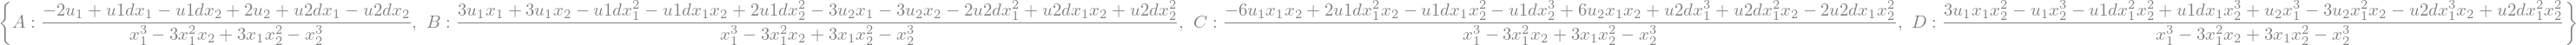

In [4]:
sol

In [25]:
X1 = 0.98989898989899
X2 = 1.0
U1 = 0.010099248965634692
U2 = 2.1162640019253074e-14
U1D = -0.9994916126228258
U2D = -1.0000000000544869

a = sol[A].subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)])
b = sol[B].subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)])
c = sol[C].subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)])
d = sol[D].subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)])


A:1.56504832179598, B:-4.69659728999613, C:3.69804961422051, D:-0.566500646020359


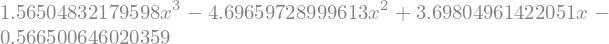

In [26]:
print(f'A:{a}, B:{b}, C:{c}, D:{d}')
spl = a*x**3 + b*x**2 + c*x + d
display(spl)

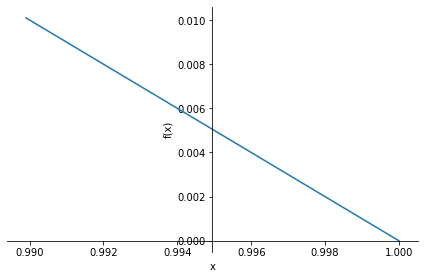

In [27]:
sp.plotting.plot(spl, (x,X1,X2))

In [14]:
aa = sp.N(sol[A].subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)]))

BB = (u2d-u1d+3*aa*(x1**2-x2**2))/(2*(x2-x1))
bb = sp.N(BB.subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)]))

CC = u1d + 3*aa*x1**2-2*bb*x1 
cc = sp.N(CC.subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)]))

DD = u1-aa*x1**3-bb*x1**2-cc*x1
dd = sp.N(DD.subs([(x1,X1), (x2,X2), (u1,U1), (u2,U2), (u1d,U1D), (u2d,U2D)]))

In [15]:
print(f'A:{aa}, B:{bb}, C:{cc}, D:{dd}')
spl2 = aa*x**3 + bb*x**2 + cc*x + dd
display(spl2)

A:-18.9442000000000, B:20.4163000000000, C:1.00000000000000, D:1.48490000000000


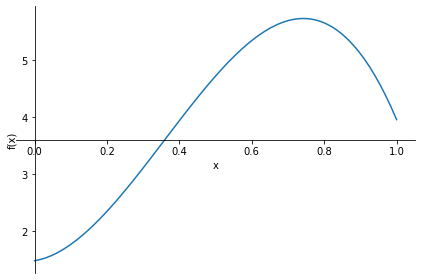

In [16]:
sp.plotting.plot(spl2, (x,0,1))

### Koeficienty:

#### Metoda 1
$$ A = \frac{- 2 u_{1} + u_1' x_{1} - u_1' x_{2} + 2 u_{2} + u_2' x_{1} - u_2' x_{2}}{x_{1}^{3} - 3 x_{1}^{2} x_{2} + 3 x_{1} x_{2}^{2} - x_{2}^{3}} $$


$$ B = \frac{3 u_{1} x_{1} + 3 u_{1} x_{2} - u_1' x_{1}^{2} - u_1' x_{1} x_{2} + 2 u_1' x_{2}^{2} - 3 u_{2} x_{1} - 3 u_{2} x_{2} - 2 u_2' x_{1}^{2} + u_2' x_{1} x_{2} + u_2' x_{2}^{2}}{x_{1}^{3} - 3 x_{1}^{2} x_{2} + 3 x_{1} x_{2}^{2} - x_{2}^{3}} $$


$$ C = \frac{- 6 u_{1} x_{1} x_{2} + 2 u_1' x_{1}^{2} x_{2} - u_1' x_{1} x_{2}^{2} - u_1' x_{2}^{3} + 6 u_{2} x_{1} x_{2} + u_2' x_{1}^{3} + u_2' x_{1}^{2} x_{2} - 2 u_2' x_{1} x_{2}^{2}}{x_{1}^{3} - 3 x_{1}^{2} x_{2} + 3 x_{1} x_{2}^{2} - x_{2}^{3}} $$


$$ D = \frac{3 u_{1} x_{1} x_{2}^{2} - u_{1} x_{2}^{3} - u_1' x_{1}^{2} x_{2}^{2} + u_1' x_{1} x_{2}^{3} + u_{2} x_{1}^{3} - 3 u_{2} x_{1}^{2} x_{2} - u_2' x_{1}^{3} x_{2} + u_2' x_{1}^{2} x_{2}^{2}}{x_{1}^{3} - 3 x_{1}^{2} x_{2} + 3 x_{1} x_{2}^{2} - x_{2}^{3}} $$

nebo ve jmenovateli vždy:

$$\left(x_{1} - x_{2}\right)^{3}$$




#### Metoda 2
$$ A = \frac{- 2 u_{1} + u_1' x_{1} - u_1' x_{2} + 2 u_{2} + u_2' x_{1} - u_2' x_{2}}{x_{1}^{3} - 3 x_{1}^{2} x_{2} + 3 x_{1} x_{2}^{2} - x_{2}^{3}} $$

nebo:

$$ A = \frac{- 2 u_{1} + u_1' x_{1} - u_1' x_{2} + 2 u_{2} + u_2' x_{1} - u_2' x_{2}}{\left(x_{1} - x_{2}\right)^{3}} $$




$$ B = \frac{u_2' - u_1' + 3A(x_1^2-x_2^2)}{2(x_2-x_1)} $$


$$ C = u_1'-3Ax_1^2-2Bx_1 $$


$$ D = u_1 -Ax_1^3 - Bx_1^2 - Cx_1 $$
